# 🚗 Yad2 Car Price Prediction

This notebook explores and analyzes the Yad2 dataset to predict used car prices in Israel.


## 📊 Data Exploration

We start by loading the dataset and inspecting its structure.


In [18]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Yad2.csv')

# Display basic info
print("### Dataset Info ###")
print(data.info())

# Check for missing values
print("\n### Missing Values ###")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Check for duplicates
duplicate_rows = data.duplicated().sum()
print(f"\n### Number of duplicate rows: {duplicate_rows} ###")

# Drop duplicates
data = data.drop_duplicates().reset_index(drop=True)

# Summary statistics for numerical columns
print("\n### Numerical Column Statistics ###")
print(data.describe())


### Dataset Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand                    15290 non-null  object 
 1   model                    15276 non-null  object 
 2   car_name                 15290 non-null  object 
 3   price                    15290 non-null  float64
 4   year                     15290 non-null  int64  
 5   hand_num                 15290 non-null  int64  
 6   horse_power              15140 non-null  float64
 7   4x4                      15290 non-null  int64  
 8   fuel_type                15290 non-null  object 
 9   engine_volume            14776 non-null  float64
 10  valid_test               15290 non-null  int64  
 11  magnesium_wheels         15290 non-null  int64  
 12  distance_control         15290 non-null  int64  
 13  economical               15290 non-null  int64  
 14  a

## 📈 Data Visualization

Let's visualize the price distribution and relationship with the year.


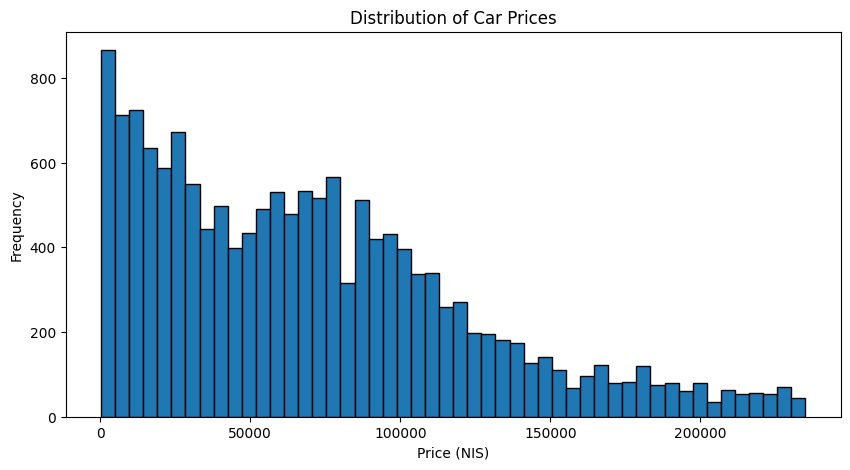

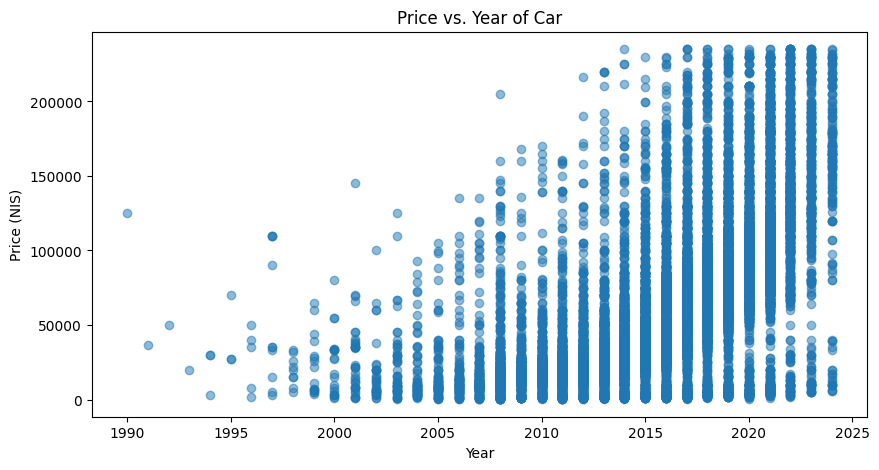

In [19]:

# Visualization: Price Distribution
plt.figure(figsize=(10, 5))
plt.hist(data['price'], bins=50, edgecolor='black')
plt.xlabel('Price (NIS)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

# Visualization: Price vs. Year
plt.figure(figsize=(10, 5))
plt.scatter(data['year'], data['price'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Price (NIS)')
plt.title('Price vs. Year of Car')
plt.show()


## 🛠️ Data Cleaning

We clean the dataset by handling missing values, removing duplicates, and fixing incorrect values.


In [20]:

# Handling Missing Values
data['model'] = data['model'].fillna('Unknown')
data['horse_power'] = data['horse_power'].fillna(data['horse_power'].median())
data['engine_volume'] = data['engine_volume'].fillna(data['engine_volume'].median())

# Remove unrealistic values
data = data[(data['horse_power'] > 20) & (data['horse_power'] < 1000)].copy()
data = data[(data['engine_volume'] >= 0.5) & (data['engine_volume'] <= 7.0)].copy()
data = data[data['price'] >= 500].copy()

# Convert categorical columns
categorical_columns = ['brand', 'model', 'fuel_type', 'brand_group']
data[categorical_columns] = data[categorical_columns].astype('category')

# Create new feature: car age
data['car_age'] = 2025 - data['year']

# Drop unnecessary columns
data.drop(columns=['car_name', 'brand_normalized', 'valid_test', 'cluster_label'], inplace=True, errors='ignore')

# Display cleaned dataset summary
print("\n### Cleaned Dataset Info ###")
print(data.info())



### Cleaned Dataset Info ###
<class 'pandas.core.frame.DataFrame'>
Index: 15268 entries, 0 to 15278
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   brand                    15268 non-null  category
 1   model                    15268 non-null  category
 2   price                    15268 non-null  float64 
 3   year                     15268 non-null  int64   
 4   hand_num                 15268 non-null  int64   
 5   horse_power              15268 non-null  float64 
 6   4x4                      15268 non-null  int64   
 7   fuel_type                15268 non-null  category
 8   engine_volume            15268 non-null  float64 
 9   magnesium_wheels         15268 non-null  int64   
 10  distance_control         15268 non-null  int64   
 11  economical               15268 non-null  int64   
 12  adaptive_cruise_control  15268 non-null  int64   
 13  cruise_control           15268 non-n

## 🔢 Feature Engineering

We encode categorical features and scale numerical values for better model performance.


In [21]:

#%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
categorical_cols = ['brand', 'model', 'fuel_type', 'brand_group']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['horse_power', 'engine_volume', 'car_age', 'hand_num']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


## 🤖 Model Training

We split the dataset into training and test sets and train a Linear Regression model.


In [22]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
features = [
    'brand', 'model', 'fuel_type', 'brand_group',
    'horse_power', 'engine_volume', 'car_age', 'hand_num',
    '4x4', 'magnesium_wheels', 'distance_control', 'economical',
    'adaptive_cruise_control', 'cruise_control'
]
target = 'price'

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Absolute Error (MAE): 24753.57
Mean Squared Error (MSE): 1321454765.97
R² Score: 0.54
